# **Popularity score of music tracks**

## 1) EDA

# importing the libraries and set the environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# Before starting the analysis, we import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# downloading the resources

In [5]:
# Then, we import the dataset
df = pd.read_csv("C:/Users/MTres/Downloads/popularity_score_dataset.csv")

**1. Header**

Have a general look at the dataset: use df.head() and df.info() and try to understand what the columns are saying and the main characteristics

In [6]:
#We use the function df.head() to display the first few rows of the dataframe.
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [7]:
#with the df.info() function, we obtain information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

we have very mixed column type, therefore based on the features that we will use we will make some transformations

In [8]:
# with the df.info() function, we obtain information about the size of the dataframe
df.shape

(114000, 21)

brief description of the DataFrame features

● track_id: A unique identifier for each track.

● artists: The artists who performed the track. A single track can have multiple artists, separated by a semicolon.

● album_name: The name of the album that the track appears on.

● track_name: The name of the track.

● popularity: The popularity score of the track, ranging from 0 to 100.

● duration_ms: The duration of the track in milliseconds.

● explicit: A binary value indicating whether the track contains explicit lyrics.

● danceability: A score indicating how danceable the track is, ranging from 0 to 1.

● energy: A score indicating the energy level of the track, ranging from 0 to 1.

● key: The key that the track is in (e.g., C, D, E, etc.).

● loudness: The loudness of the track in decibels (dB).

● mode: The mode of the track (major or minor).

● speechiness: A score indicating how much speech-like content is in the track, ranging from 0 to 1.

● acousticness: A score indicating how acoustic the track is, ranging from 0 to 1.

● instrumentalness: A score indicating how instrumental the track is, ranging from 0 to 1.

● liveness: A score indicating the presence of an audience in the recording, ranging from 0 to 1.

● valence: A score indicating the positivity of the track, ranging from 0 to 1.

● tempo: The tempo of the track in beats per minute (BPM).

● time_signature: The time signature of the track (e.g., 4/4, 3/4, etc.).

● track_genre: The genre of the track (if available).


from the description on the features we can see that there is a column called track_id that seems to be the unique identifier for each track. let's see if it is true

In [9]:
df['track_id'].nunique()

89741

as we can see there are only 89741 unique values out of the all 114000 rows, therefore we can see more in detail in what differ the rows that have the same track_id

In [10]:
#First, with the df.describe() function, we get a summary statistics of the data 
track = df[df['track_id'].duplicated()].sort_values('track_id')
track.head(30)

Unnamed: 0                track_id                       artists  \
103211      103211  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby   
100420      100420  001YQlnDSduXd5LgBd66gT                   Soda Stereo   
91801        91801  003vvx7Niy0yvhvHt4a68B                   The Killers   
3257          3257  003vvx7Niy0yvhvHt4a68B                   The Killers   
94239        94239  004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu   
97533        97533  006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
77391        77391  006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gusttavo Lima   
112131      112131  006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64662        64662  006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
63142        63142  006tmNZLXEXPqdb23wwSN1                    İlhan İrem   
64246        64246  00970cTs7LnxWt0d5Qk08m               Ella Fitzgerald   
71588        71588  00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   
37714        37714  00B7SBwrjbycLMOgAmeIU8         Red Hot Chili Peppers   
102528      102528  00EsQxsJv6vy7hEQN3jZWG                    Leah Nobel   
24525        24525  00GVRTIWMjYwwHEjTLclgf                   Robert Hood   
86029        86029  00IiTu5o9IVasXMX3udpZo                   Simple Plan   
52766        52766  00JZ83w0Qm09f4PwWj06sM                  George Jones   
44065        44065  00KfIFi2TpAaQGPbRbFbKJ                   Linkin Park   
71319        71319  00KfIFi2TpAaQGPbRbFbKJ                   Linkin Park   
9962          9962  00LmM2QLGpfb5NC7PC7qqZ                        Criolo   
68223        68223  00PBSElFPJbnIcFS7orAm2                        Jhayco   
89279        89279  00PBSElFPJbnIcFS7orAm2                        Jhayco   
88285        88285  00PBSElFPJbnIcFS7orAm2                        Jhayco   
96156        96156  00Rptyyrh7YXjPwjd7SAsV                   Exaltasamba   
97561        97561  00UZySJXRYQgnOrlzluIIm                   Lucas Lucco   
56324        56324  00YwP3wJWiG8IxAA7OS9lo                    Anupam Roy   
102269      102269  00YwP3wJWiG8IxAA7OS9lo                    Anupam Roy   
65813        65813  00YwP3wJWiG8IxAA7OS9lo                    Anupam Roy   
57529        57529  00YwP3wJWiG8IxAA7OS9lo                    Anupam Roy   
99268        99268  00YwP3wJWiG8IxAA7OS9lo                    Anupam Roy   

                                               album_name  \
103211                                            New RnB   
100420                           Soda Stereo (Remastered)   
91801                                            Hot Fuss   
3257                                             Hot Fuss   
94239                                        Loners Diary   
97533                     CP 25 Anos (Ao Vivo em Aracaju)   
77391                     CP 25 Anos (Ao Vivo em Aracaju)   
112131                          Bezginin Gizli Mektupları   
64662                           Bezginin Gizli Mektupları   
63142                           Bezginin Gizli Mektupları   
64246                               Weihnachtslieder 2022   
71588                         Return of the Dream Canteen   
37714                         Return of the Dream Canteen   
102528  To All The Boys: Always and Forever (Music Fro...   
24525                                     Internal Empire   
86029                               Holly Jolly Christmas   
52766                                           With Love   
44065                                       LIVING THINGS   
71319                                       LIVING THINGS   
9962                                       Ainda Há Tempo   
68223                                   Frescura y Perreo   
89279                                   Frescura y Perreo   
88285                                   Frescura y Perreo   
96156                                        Esquema Novo   
97561                     O Destino (Bonus Track Version)   
56324                            Doorbiney Chokh Rakhbona   
1022

as we can see rows with the same track_id can differ in terms of:
- track_genre
- popularity

therefore we can already understand that the popularity of a song can change based on its genre

**2.Description**

Look at the summary statistics of the data: use df.describe() to get a quick overview of the central tendency, dispersion, and shape of the distribution of each variable.

In [11]:
#With the df.describe() function, we get a summary statistics of the data
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

by looking at the summary statistics, we can already say that:
- *popularity* (our target variable) has a mean of 33% and a standard deviation of 22%, with a minimum of 0 and a maximum of 100. therefore the data is likely skewed to the left. This may mean that the majority of items or elements have low popularity, indicating that there are few highly popular exceptions, but most items have modest or low popularity.
- *duration_ms* has the maximum value that is very far from the third quantile (the 75% of values reach at least 2.5 millions, while the range is 0 to 5 millions), and this could generate a lot of noise within the model.
- furthermore by looking at the general difference between min and max values of different features, we can already say that we will have to perform some scaling in order to have a better performance.

**3.Check for non valid values**

Check for errors: count the Not a Number (NaN) values in the DataFrame using df.isnull().sum()

In [12]:
#we check the null value
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

as we can see only 3 features has null values and actually only 3 rows overall, therefore considering the size of the dataframe we can remove these rows without a significant information loss.

In [13]:
# drop null values
df.dropna(inplace = True)

In [14]:
# drop unnamed column (is a repetition of the index column)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

**4. Check for duplicates**

Check for duplicate records: use df.duplicated().sum() to count the number of duplicates

In [15]:
#check the duplicated value
df.duplicated().sum()

450

in order to ensure accurate, consistent, and high-quality data for analysis and modeling, we will proceed by removing the duplicate values.

In [16]:
# drop duplicated
df.drop_duplicates(inplace=True)

**5. Correlation**

Correlation: use df.corr() to compute the Pearson Correlation matrix of the columns. Visualize the correlation matrix using a heatmap.

In [17]:
#In order to see how the variables are correlated with each other, we create the correlation matrix
corr_df = df.corr()
corr_df

popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.007928  0.043938      0.034407 -0.002447   
duration_ms        -0.007928     1.000000 -0.066005     -0.074117  0.058160   
explicit            0.043938    -0.066005  1.000000      0.122179  0.096256   
danceability        0.034407    -0.074117  0.122179      1.000000  0.131694   
energy             -0.002447     0.058160  0.096256      0.131694  1.000000   
key                -0.004167     0.008519  0.004843      0.036546  0.048047   
loudness            0.047368    -0.004233  0.107988      0.256559  0.760624   
mode               -0.015009    -0.035961 -0.037387     -0.069783 -0.079331   
speechiness        -0.045463    -0.063194  0.307455      0.108236  0.141976   
acousticness       -0.022356    -0.103676 -0.093748     -0.169181 -0.732747   
instrumentalness   -0.094718     0.125301 -0.103169     -0.183974 -0.179967   
liveness           -0.005668     0.010199  0.032367     -0.131651  0.184810   
valence            -0.041097    -0.154795 -0.003779      0.476755  0.258451   
tempo               0.012187     0.024312 -0.003097     -0.051517  0.247361   
time_signature      0.030567     0.018351  0.038234      0.207370  0.186671   

                       key  loudness      mode  speechiness  acousticness  \
popularity       -0.004167  0.047368 -0.015009    -0.045463     -0.022356   
duration_ms       0.008519 -0.004233 -0.035961    -0.063194     -0.103676   
explicit          0.004843  0.107988 -0.037387     0.307455     -0.093748   
danceability      0.036546  0.256559 -0.069783     0.108236     -0.169181   
energy            0.048047  0.760624 -0.079331     0.141976     -0.732747   
key               1.000000  0.038359 -0.135871     0.020820     -0.041124   
loudness          0.038359  1.000000 -0.042074     0.060088     -0.588111   
mode             -0.135871 -0.042074  1.000000    -0.046773      0.096548   
speechiness       0.020820  0.060088 -0.046773     1.000000     -0.001378   
acousticness     -0.041124 -0.588111  0.096548    -0.001378      1.000000   
instrumentalness -0.006819 -0.432109 -0.050787    -0.089214      0.102134   
liveness         -0.001518  0.076792  0.013900     0.205092     -0.020313   
valence           0.034233  0.279428  0.021411     0.036393     -0.106240   
tempo             0.010903  0.212181  0.000371     0.017167     -0.207620   
time_signature    0.015122  0.191648 -0.024365    -0.000397     -0.175621   

                  instrumentalness  liveness   valence     tempo  \
popularity               -0.094718 -0.005668 -0.041097  0.012187   
duration_ms               0.125301  0.010199 -0.154795  0.024312   
explicit                 -0.103169  0.032367 -0.003779 -0.003097   
danceability             -0.183974 -0.131651  0.476755 -0.051517   
energy                   -0.179967  0.184810  0.258451  0.247361   
key                      -0.006819 -0.001518  0.034233  0.010903   
loudness                 -0.432109  0.076792  0.279428  0.212181   
mode                     -0.050787  0.013900  0.021411  0.000371   
speechiness              -0.089214  0.205092  0.036393  0.017167   
acousticness              0.102134 -0.020313 -0.106240 -0.207620   
instrumentalness          1.000000 -0.079847 -0.324314 -0.049939   
liveness                 -0.079847  1.000000  0.019339  0.000547   
valence                  -0.324314  0.019339  1.000000  0.077640   
tempo                    -0.049939  0.000547  0.077640  1.000000   
time_signature           -0.081951 -0.023902  0.133790  0.066900   

                  time_signature  
popularity              0.030567  
duration_ms             0.018351  
explicit                0.038234  
danceability            0.207370  
energy                  0.186671  
key                     0.015122  
loudness                0.191648  
mode                   -0.024365  
speechiness            -0.000397  
acousticness           -0.175621  
instrumentalness       -0.081951  
liveness   

<Figure size 1200x1000 with 0 Axes>

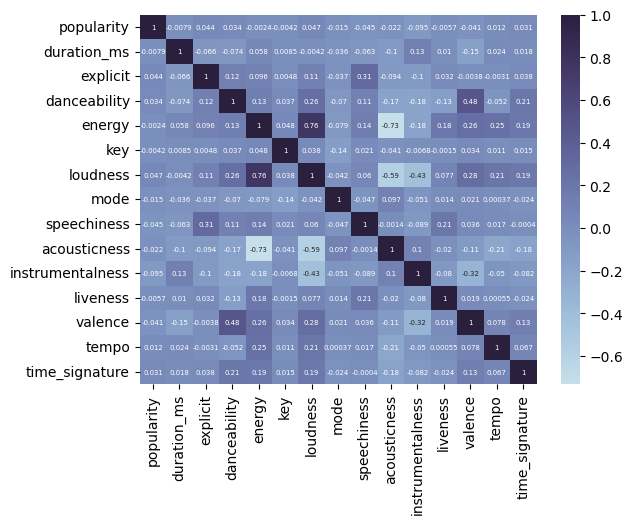

In [18]:
#We create an heatmap to have a better visualization of the matrix
plt.figure(figsize=(12, 10))

fig, ax = plt.subplots()
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True), ax=ax, annot_kws={"fontsize": 5})

plt.show()

- acustiness e energy are strongly negatively correlated -0.733908
- energy e loudness are strongly positively correlated al 0.761690
- valence and danceability also are strong correlated 0.476755

however there is no correlation higher than 80%, so we don't have to worry about multicollinearity.

Moreover, we can already see that none of the different feature has a strong correlation with our target variable.
We can have a more precise understanding about the different relationships among pair of features by plotting a pairplot.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


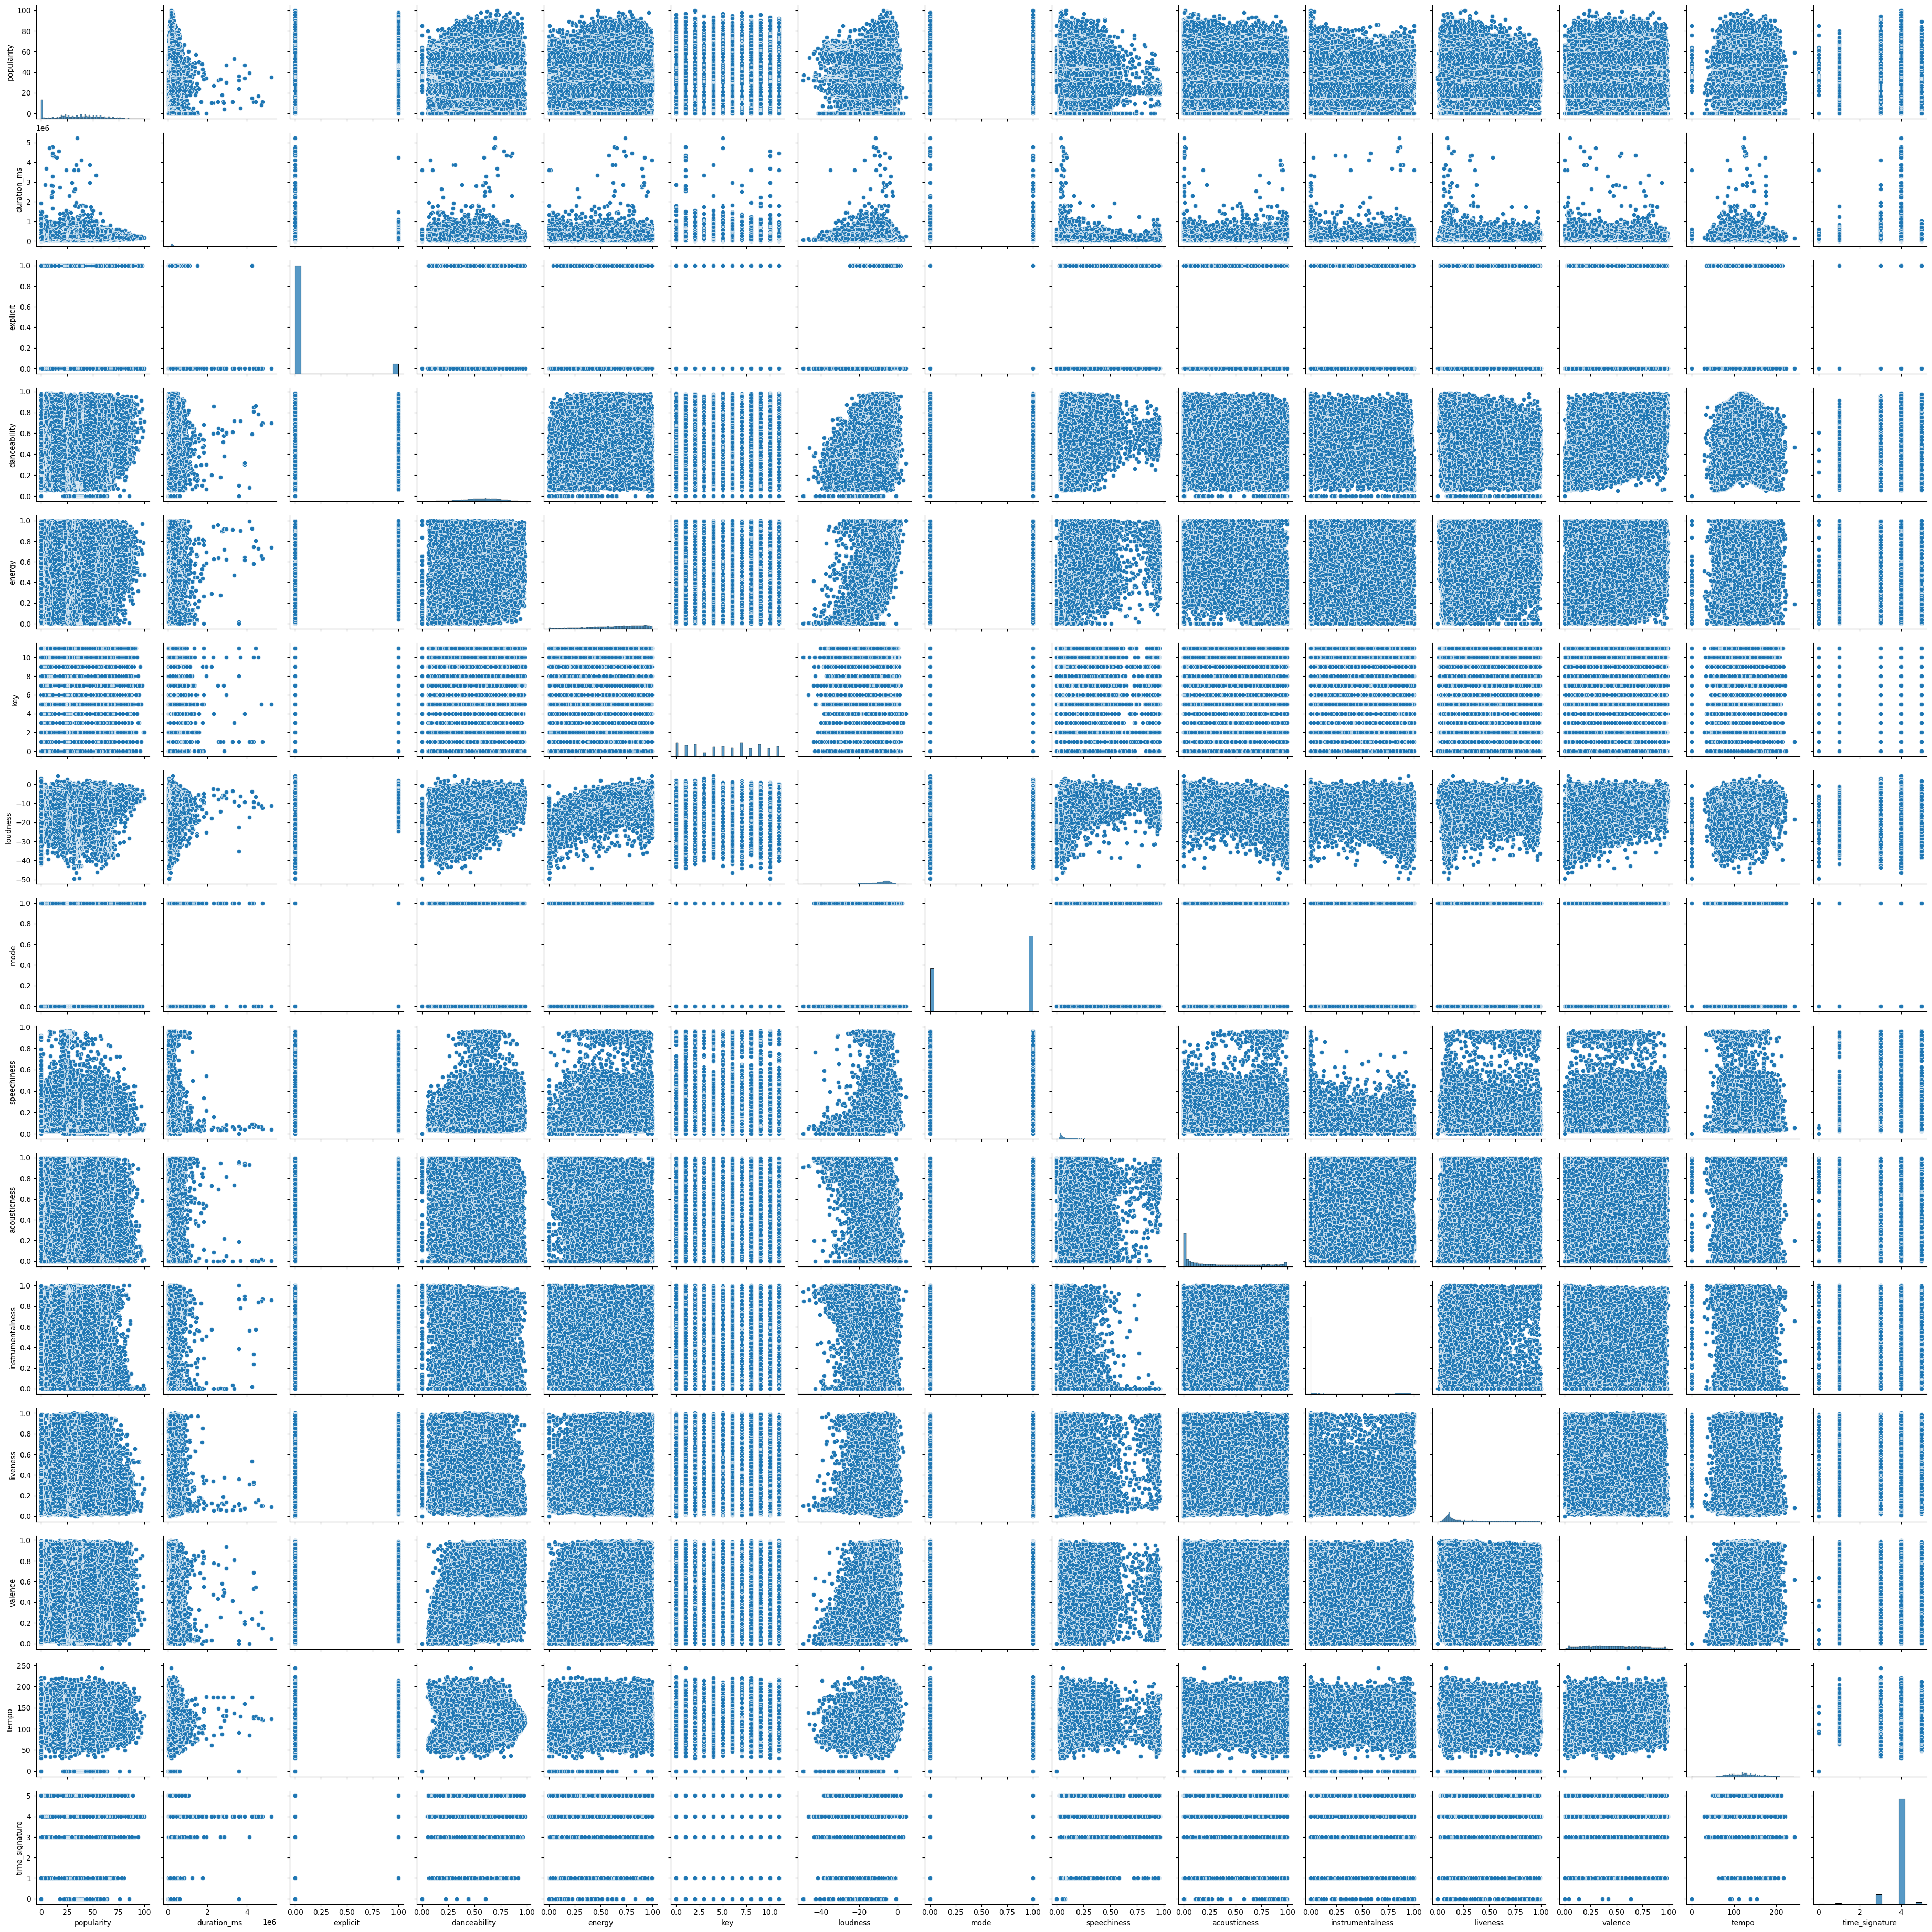

In [19]:
#With the function sns.pairplot(df), 
#we create a grid of scatter plots that show the relationships between all pairs of variables in the DataFrame. 
sns.pairplot(df)

this pairplot confirms that there are no linear correlations between variables

**6. Plot the distribution**

Plot the distribution of the features to see if variables have some kind of skewed/asymmetric/broad distribution.
Check for the distribution by using df.plot(kind='hist') or df.plot(kind='kde') for a more detailed representation.

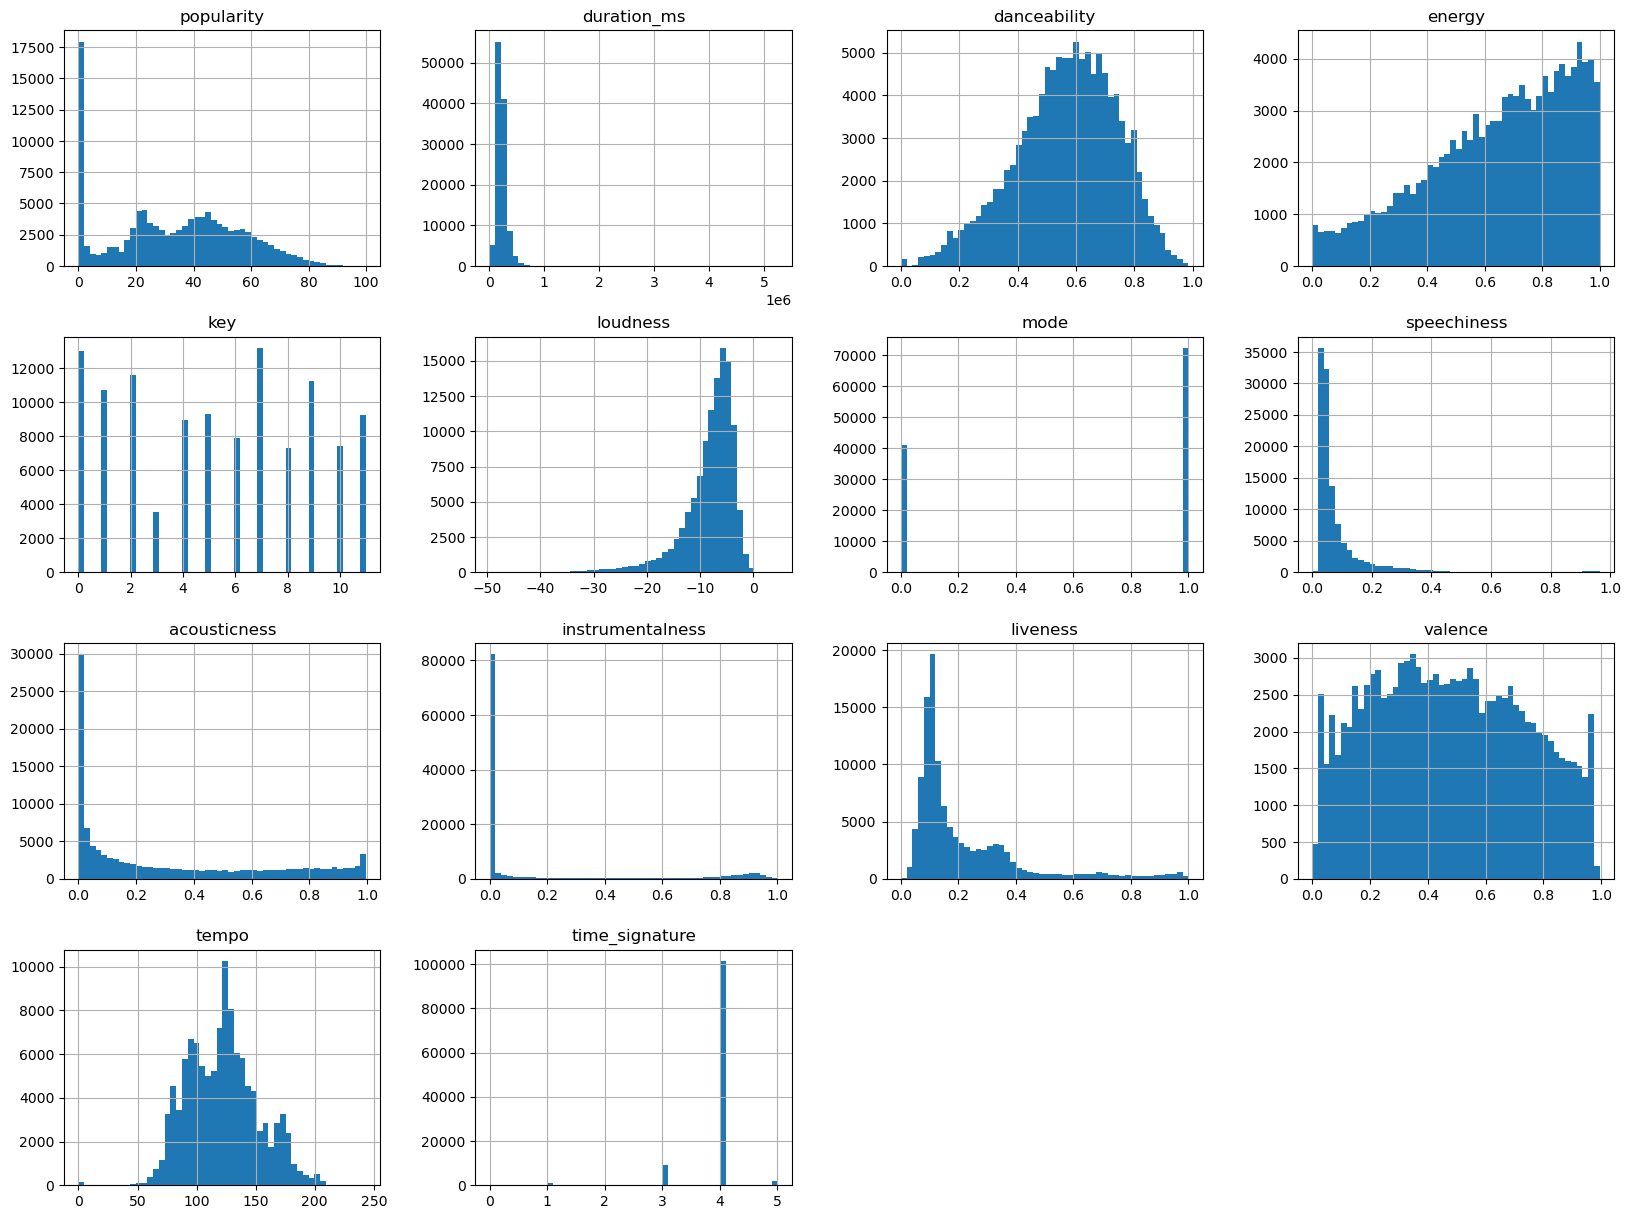

In [20]:
# Then we plot the histogram for each numerical variable
df.hist(bins=50, figsize=(20,15))
plt.show()

insights:
- we can see that for popularity many values are 0
- we can see that duration_ms the range goes from 0 to 5, but all the values are mainly concentrated between 0 and 1
- many histograms are skewed, and this is a confirmation that transformations need to be applied


we then created some **boxplots**, very useful to have a concise graphical representation of the key characteristics of a dataset and to easily see:
- outliers
- comparing distributions

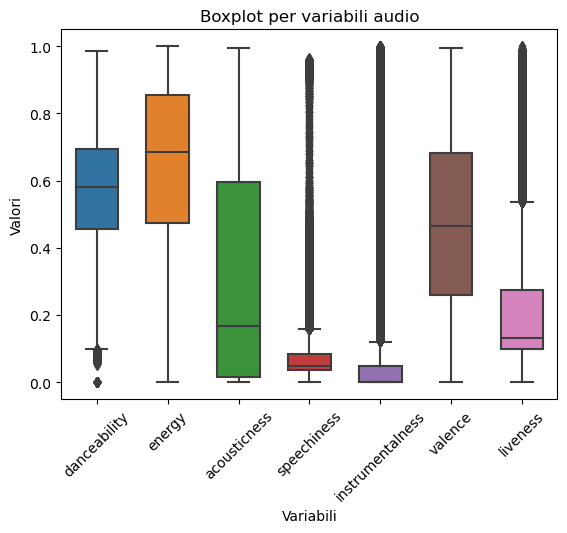

In [21]:
#Creation of some Boxplot in order to compare some audio features that have similar range of values (0-1) and are more comparable

# Select only the variables of interest
variabili_audio_same_scale = ['danceability', 'energy', 'acousticness', 'speechiness', 'instrumentalness', 'valence','liveness']
df_audio = df[variabili_audio_same_scale]

# Creating boxplots using Seaborn
sns.boxplot(data=df_audio, width= 0.6)

# Adding title and axis labels
plt.title("Boxplot per variabili audio")
plt.xticks(rotation = 45)
plt.xlabel("Variabili")
plt.ylabel("Valori")

#Showing the plot
plt.show()

INSIGHTS:
- danceability, energy, acousticness and valence have acceptable values
- the others have a large number of outliers. In particular we can notice a high concentration of data at low values and outliers at high values.

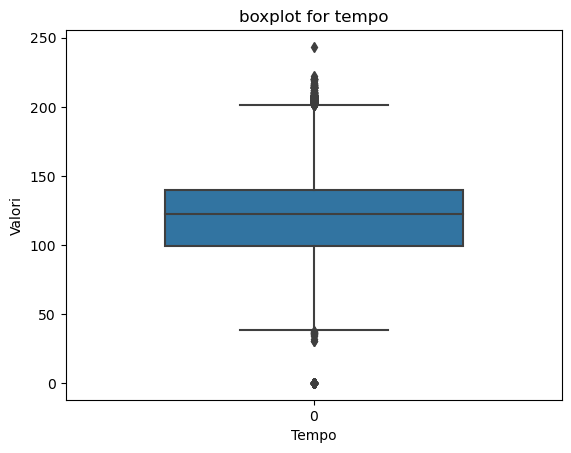

In [22]:
#We create the boxplot for audio features with different values
# Creating boxplots using Seaborn
# 1. tempo
sns.boxplot(data=df['tempo'], width= 0.6)

# Adding title and axis labels
plt.title("boxplot for tempo")
plt.xlabel("Tempo")
plt.ylabel("Valori")

# Showing the plot
plt.show()

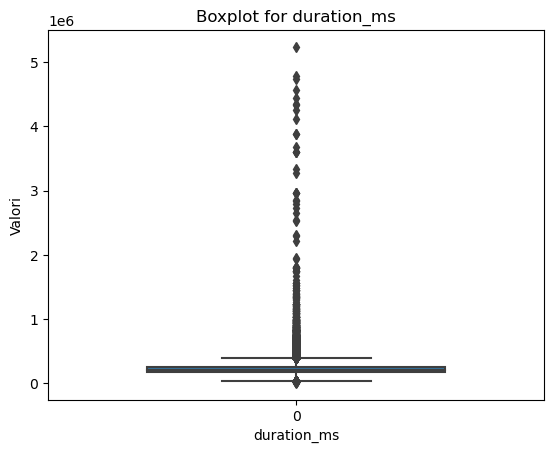

In [23]:
# 2. duration_ms
sns.boxplot(data=df['duration_ms'], width= 0.6)

# Adding title and axis labels
plt.title("Boxplot for duration_ms")
plt.xlabel("duration_ms")
plt.ylabel("Valori")

# Showing the plot
plt.show()

here we can see that the interquantile difference of duration_ms is very small, ranging from 0 to around 0.5, while few values are very far from those 

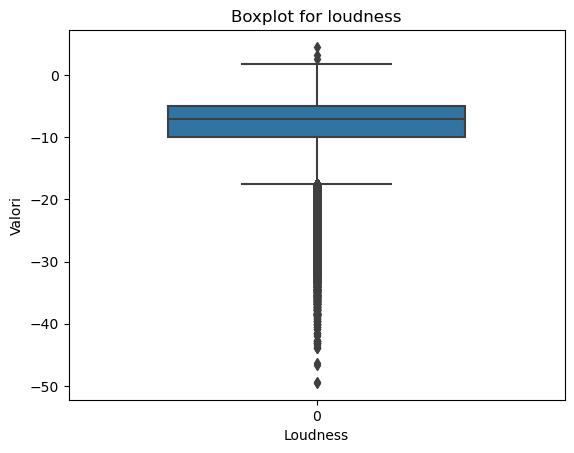

In [24]:
# 3. loudness
sns.boxplot(data=df['loudness'], width= 0.6)

# Adding title and axis labels
plt.title("Boxplot for loudness")
plt.xlabel("Loudness")
plt.ylabel("Valori")

# showing the plot
plt.show()

Considering what we discovered earlier, that popularity for the same song (same track_id) can vary according to musical genre, let's examine **the top 10 track_genre based on the average popularity**.

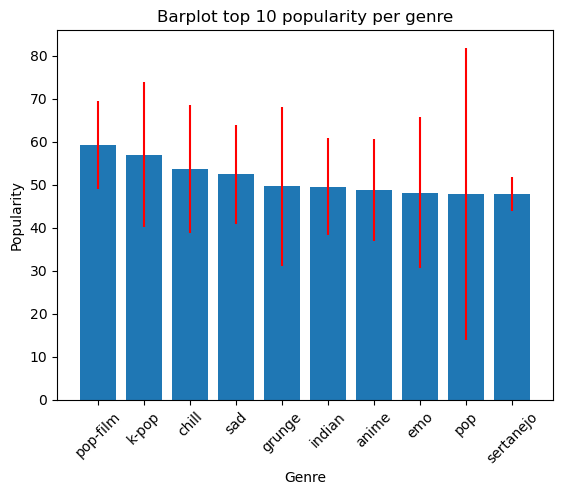

In [25]:
# Group the rows based on genre
grouped_genre = df.groupby('track_genre')

# Calculate the popularity score for each genre
avg_popularity_genre = grouped_genre['popularity'].mean() # calculate the mean
std_popularity_genre = grouped_genre['popularity'].std()  # Calculate standard deviation

top_10_genre = avg_popularity_genre.nlargest(10)
top_10_std = std_popularity_genre.loc[top_10_genre.index]  # Get standard deviation for top 10 genres

# Making the plot
plt.bar(top_10_genre.index, top_10_genre)  # Plot mean values
plt.errorbar(top_10_genre.index, top_10_genre, yerr=top_10_std, linestyle='None', color='r')  # Plot standard deviation
plt.title("Barplot top 10 popularity per genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Popularity")

plt.show()


INSIGHTS:
- the genre with higher average popularity (pop-film) has a lower standard deviation compared to another genre (pop) that has lower average popularity but a higher standard deviation 
- sertanejo is the genre with the lower average popularity and the lower standard deviation

To get a more complete picture let's look at the **top 10 music artists according to their average popularity**

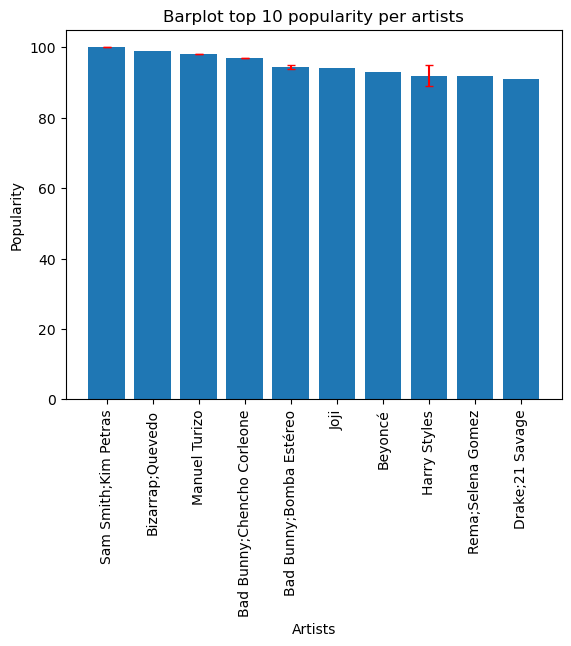

In [26]:
df_artisti = df.assign(artisti=df['artists'].str.split(';')).explode('artists')

# "Select the rows of the dataframe that contain ';'."
condition = df['artists'].str.contains(';')
# Drop the rows that satisfy the condition
df_descrittive = df.drop(df[condition].index)

# Check how many times each artist appears in the 'artists' column
artist_counts = df['artists'].value_counts()
# Select the artists that appear at least twice
selected_artists = artist_counts[artist_counts >= 2].index
# Select the rows of the dataframe that contain the selected artists
df_descrittive = df[df['artists'].isin(selected_artists)]

# Group the rows based on the artist
grouped_artists = df.groupby('artists')
# Calculate the popularity score for each artist
avg_popularity_artists = grouped_artists['popularity'].mean()
std_popularity_artists = grouped_artists['popularity'].std()

top_10_artists = avg_popularity_artists.nlargest(10)
top_10_std = std_popularity_artists.loc[top_10_artists.index]

# Make the plot
plt.bar(top_10_artists.index, top_10_artists)
plt.errorbar(top_10_artists.index, top_10_artists, yerr=top_10_std, fmt='none', color='red', capsize=3)
plt.title("Barplot top 10 popularity per artists")
plt.xticks(rotation=90)
plt.xlabel("Artists")
plt.ylabel("Popularity")

plt.show()


# Data Preprocessing

Having previously noted that identical track_ids can have different popularity levels and different genres, we might consider dropping duplicate track_ids to eliminate some noise by associating each unique value with the highest popularity level for that track_id. This is because, with the goal in mind of identifying patterns and trends that can inform recommendations for future music releases, we are interested in recommending more popular songs and thus understanding what characteristics make a song popular.
At the same time, however, it might be more interesting to keep the same song in different genres and observe the variability of popularity levels. This could provide useful information on the relevance of genre in determining a song's popularity.

By having this in mind, we provide the code for data preprocessing that can be changed between True or False depending on the idea for the analysis

*however from what will results from the model, put the drop_duplicates to False will let the models perform better*
This could be due to the fact that it is easier for the model when it sees 2 identical songs differing only in genre to predict which genre will have the higher and which the lower popularity and therefore the performance could improve.

In [27]:
drop_duplicates = False
if drop_duplicates:
    df = df.sort_values(by=['popularity']).reset_index()
    df = df.drop_duplicates(['track_name', 'artists', 'duration_ms'], keep='last') # drop duplicates by seeing those that have the same track_name, artists and duration_ms (it is difficult for different songs to have the same duration in milliseconds)

with this code to True we also remove the duplicates of track_id 

### Split train test

In [28]:
# trasform explicit type from boolean to int64
df['explicit'] = df.explicit.astype(np.int64)

In [29]:
df['track_name'].nunique()

73608

considering that the dataset is very large and the 'track_name' column contains a wide range of unique values, removing this column could help reduce the dimensionality of the dataset and simplify the modelling process.

In [30]:
# create X and y
X = df.copy()
X.drop(['popularity', 'track_id', 'track_name'], axis = 1, inplace=True)

y = df['popularity']
y = pd.DataFrame(y)

### data binning

As the distribution of the popularity score was not constant among 
different values we implemented a data binning methodology to partition the original dataset into 
a training and test set containing the same proportion of popularity Score values. This involved 
dividing the original dataset into 10 different subsets, or 'bins', where each bin contained observations 
in a specific range of values of the popularity. To create the train and test sets, 80% of each bin was used for training and the remaining 20% was used for testing

In [31]:
# Define the bins for the categories
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define the labels for the categories
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Create a new column with the categories based on the numerical column
X["bins"] = pd.cut(y.values.ravel(), bins=bins, labels=labels)


In [32]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = X["bins"])

# remove 'bins' column cause it was needed only to make the split
X_train = X_train.drop("bins", axis = 1)

X_test = X_test.drop("bins", axis = 1)

Text(0.5, 1.0, 'popularity after data binning')

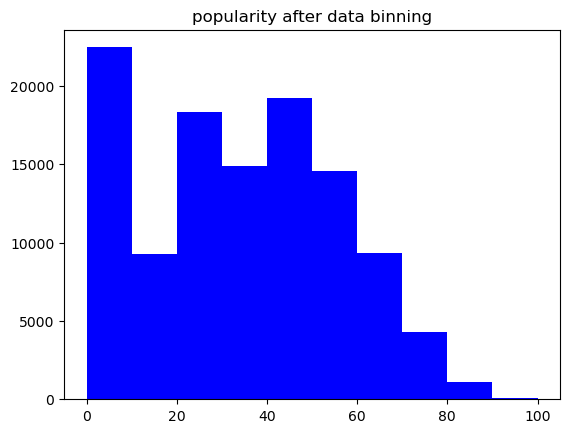

In [33]:
plt.hist(y, color = "blue")
plt.title('popularity after data binning')

Considering what was said above about the variable duration_ms, let us proceed to its transformation.

Text(0.5, 1.0, 'distribution of duration_ms before transformation')

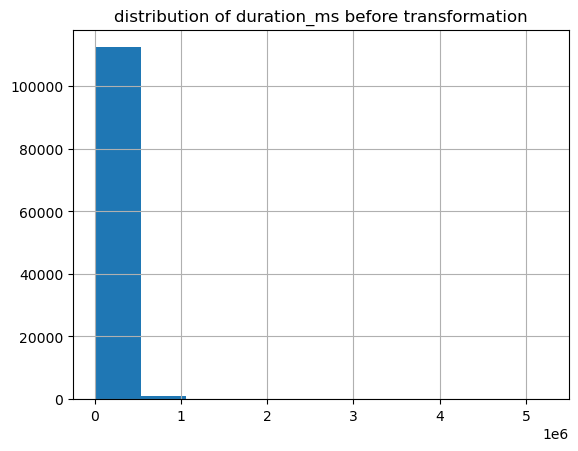

In [34]:
df['duration_ms'].hist()
plt.title('distribution of duration_ms before transformation')

In [35]:
df['duration_ms'].quantile(0.99) # calculates the 99th percentile of the 'duration_ms' column. It returns a single value that represents the threshold below which 99% of the data falls.
df[df['duration_ms']>df['duration_ms'].quantile(0.99)].shape # filters the DataFrame to include only rows where the 'duration_ms' value is greater than the 99th percentile threshold.

(1136, 20)

By using these two lines of code together, is possible to identify and analyze the subset of rows in the DataFrame where the 'duration_ms' values are greater than the 99th percentile threshold (1136). 
So, considering that the value of those 1136 rows is just noise, we are going to transform the values above the 99% threshold (before this threshold the rows were too many) in a way that any values in 'duration_ms' that exceed the threshold are replaced with the threshold value itself. This process ensures that the upper values of 'duration_ms' in the training data are constrained and do not disproportionately influence the model's learning process.

In [36]:
# determines a threshold value above which 99% of the 'duration_ms' data falls
duration_third_quartile = X_train['duration_ms'].quantile(0.99) 

# Clip the values above the threshold for the specified variables in the training data
X_train['duration_ms'] = X_train['duration_ms'].clip(upper=duration_third_quartile)

# Clip the values above the third quartile for the specified variables in the test data
X_test['duration_ms'] = X_test['duration_ms'].clip(upper=duration_third_quartile)



Text(0.5, 1.0, 'distribution of duration_ms after transformation')

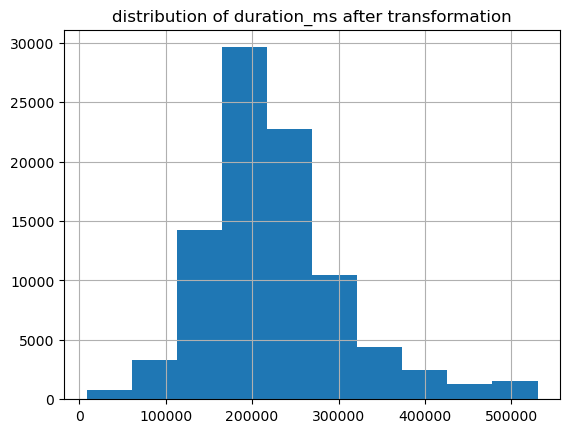

In [37]:
X_train['duration_ms'].hist()
plt.title('distribution of duration_ms after transformation')

### Encode Categorical variables

considering that the variable:
- key can assume only integer values ranges from 0 and 11
- time_signature only integer values ranges from 0 to 5 

we will proceed by treating these 2 features as categorical variables based on the meaning of the feature (key is the key that the track is in and time_signature is the time signature of the track), and therefore we will encode them with One Hot Encoding

In [38]:
# One-Hot-Encoder
from category_encoders import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(cols=['key','time_signature'])

# Encode the categorical variables
X_train_encoded_Hot = encoder.fit_transform(X_train, y_train)
X_test_encoded_Hot = encoder.transform(X_test)

by considering the general importance of the artist, the genre of the track and the name of the album, and also from the previous insights referring to the changing in popularity based on track_genre and album_name, we believe that include this features inside our model will be very important. 

Therefore we proceed with the Leave One Out Encoder techniques. It is particularly useful when dealing with high-cardinality categorical features, where the number of unique categories is large.

This encoder works by assigning a value to each category based on the target variable's mean or probability, calculated by leaving out the current observation being encoded.

In [39]:
from category_encoders import LeaveOneOutEncoder

# create an instance for LeaveOneOut encoder
encoder = LeaveOneOutEncoder(cols=['artists', 'track_genre', 'album_name'])

# Encode the categorical variables
X_train_encoded = encoder.fit_transform(X_train_encoded_Hot, y_train)
X_test_encoded = encoder.transform(X_test_encoded_Hot)

we can now check the correlation with these features that are not anymore categorical

In [40]:
# Concatenate X_train_encoded and y_train
data = pd.concat([X_train_encoded, y_train], axis=1)

# Calculate the correlation matrix
corr_new = data.corr()

corr_new


artists  album_name  duration_ms  explicit  danceability  \
artists           1.000000    0.722183     0.021281  0.031965      0.014897   
album_name        0.722183    1.000000     0.040788  0.028620      0.009857   
duration_ms       0.021281    0.040788     1.000000 -0.079168     -0.076311   
explicit          0.031965    0.028620    -0.079168  1.000000      0.121012   
danceability      0.014897    0.009857    -0.076311  0.121012      1.000000   
energy            0.008143    0.021116     0.085408  0.097675      0.135619   
key_1            -0.010585   -0.008490    -0.012242 -0.021463      0.003314   
key_2            -0.000797   -0.000980     0.003856 -0.016164     -0.018133   
key_3             0.017049    0.019744     0.012805 -0.005590     -0.021183   
key_4             0.008423    0.006652     0.004464  0.013338      0.040396   
key_5            -0.004872   -0.003654     0.013113 -0.008720     -0.006283   
key_6            -0.002097   -0.005538    -0.012227  0.000900     -0.018692   
key_7             0.006806    0.002714     0.006948  0.022094      0.020462   
key_8             0.019312    0.015340     0.003976 -0.016422     -0.039723   
key_9            -0.015521   -0.013162     0.007105  0.001003      0.017510   
key_10           -0.010112   -0.008534    -0.009583  0.013710      0.020060   
key_11           -0.006685   -0.006822    -0.022637 -0.027591     -0.011208   
key_12           -0.003457   -0.000863     0.000925  0.053758      0.019200   
loudness          0.058527    0.050938     0.018001  0.107604      0.261228   
mode             -0.008147   -0.015917    -0.047094 -0.037724     -0.070613   
speechiness      -0.050673   -0.033019    -0.080383  0.309998      0.105621   
acousticness     -0.026587   -0.038182    -0.142554 -0.092284     -0.170425   
instrumentalness -0.091125   -0.056275     0.137741 -0.104730     -0.184730   
liveness          0.011195    0.015697     0.010403  0.033127     -0.130544   
valence          -0.052541   -0.049260    -0.183312 -0.003816      0.477924   
tempo             0.024326    0.027457     0.035183 -0.005881     -0.048033   
time_signature_1 -0.031798   -0.021840    -0.039393  0.052322     -0.075709   
time_signature_2  0.055883    0.050751     0.051648  0.007113      0.266002   
time_signature_3 -0.045010   -0.044733    -0.025101 -0.030448     -0.223016   
time_signature_4 -0.013734   -0.011140    -0.026362 -0.000292     -0.076852   
time_signature_5  0.006748    0.007208    -0.044670 -0.011908     -0.124418   
track_genre       0.518872    0.413683    -0.017993  0.027498      0.034380   
popularity        0.738466    0.862515    -0.000852  0.045946      0.034985   

                    energy     key_1     key_2     key_3     key_4  ...  \
artists           0.008143 -0.010585 -0.000797  0.017049  0.008423  ...   
album_name        0.021116 -0.008490 -0.000980  0.019744  0.006652  ...   
duration_ms       0.085408 -0.012242  0.003856  0.012805  0.004464  ...   
explicit          0.097675 -0.021463 -0.016164 -0.005590  0.013338  ...   
danceability      0.135619  0.003314 -0.018133 -0.021183  0.040396  ...   
energy            1.000000 -0.027906 -0.000209 -0.009024  0.052981  ...   
key_1            -0.027906  1.000000 -0.099012 -0.087846 -0.088818  ...   
key_2            -0.000209 -0.099012  1.000000 -0.097642 -0.098722  ...   
key_3            -0.009024 -0.087846 -0.097642  1.000000 -0.087588  ...   
key_4             0.052981 -0.088818 -0.098722 -0.087588  1.000000  ...   
key_5            -0.003086 -0.108236 -0.120306 -0.106738 -0.107919  ...   
key_6            -0.051177 -0.053197 -0.059129 -0.052461 -0.053041  ...   
key_7             0.038539 -0.081657 -0.090762 -0.080526 -0.081417  ...   
key_8            -0.034110 -0.100761 -0.111996 -0.099366 -0.100465  ...   
key_9            -0.000349 -0.078526 -0.087282 -0.077439 -0.078295  ...   
key_10            0.021907 -0.078096 -0.086805 -0.077015 -0.077867  ...   
key_11           -0.047846 -0.107620 -0.119621 -0.106131 

we can see that track_name, album_name and track_genre are the only one that are highly correlated with the target variable.

Moreover, we can see that album_name is strongly correlated with popularity. However for the previous consideration to understand the different level of popularity based on the album_name (we putted drop_variable=False) is meaningfull not to drop it. 

### Feature Scaling

Feature scaling is a preprocessing step that aims to standardize or normalize the numerical features in a dataset to ensure that they are on a similar scale.

In [41]:
# divido le dummy dalle altre per fare il feature scaling
columns = ['explicit','key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'key_12', 'mode', 'time_signature_1',
       'time_signature_2', 'time_signature_3', 'time_signature_4',
       'time_signature_5']

X_train_cat = X_train_encoded[columns]

X_test_cat = X_test_encoded[columns]

X_train_encoded.drop(columns, axis = 1, inplace = True)

X_test_encoded.drop(columns, axis = 1, inplace = True)


col_train = X_train_encoded.columns

Separating the dummy variables from the other variables is important for feature scaling because dummy variables are binary (0 or 1) and have a different scale compared to other continuous variables. 
By separating the dummy variables from the other variables, you can apply feature scaling specifically to the continuous variables while leaving the binary dummy variables unchanged. This ensures that the scaling process does not affect the interpretability or the meaning of the dummy variables, which represent categorical information in the dataset.

we choose to scale our features with the **StandardScaler**:
- to normalize the distribution, that as we saw before some of them were very skewed
- to better handle outliers, considering that is less sensitive to those
- to mainteins the interpretability of the data
- to ensure that all the features will have the same importance inside the models

In [42]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns = col_train)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns = col_train)

y_train = y_train.values.ravel() # ravel() function is used to convert a 2-dimensional array or matrix into a 1-dimensional array (some algorithms will require this format)
y_test = y_test.values.ravel()

In [43]:
# merge together categorical and numerical features
listmerge = []
x = 0
for i in X_train_scaled["danceability"]:
    listmerge.append(x)
    x += 1
    

listmerge_test = []

xz = 0
for el in X_test_scaled["danceability"]:
    listmerge_test.append(xz)
    xz += 1


X_train_scaled["merge"] = listmerge
X_train_cat["merge"] = listmerge

X_test_scaled["merge1"] = listmerge_test
X_test_cat["merge1"] = listmerge_test


X_train_scaled = pd.merge(X_train_scaled, X_train_cat, on = "merge")

X_test_scaled = pd.merge(X_test_scaled, X_test_cat, on = "merge1")

X_train_scaled.drop("merge", axis = 1, inplace = True)

X_test_scaled.drop("merge1", axis = 1, inplace = True)

C:\Users\MTres\AppData\Local\Temp\ipykernel_13128\94351242.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat["merge"] = listmerge
C:\Users\MTres\AppData\Local\Temp\ipykernel_13128\94351242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat["merge1"] = listmerge_test


# K-Means

Now we are gonna perform a K-Means analysis.
In order to that we're gonna do the following task
- Creating a new data frame
- Set the K = num_genre
- Performing the k-means
- Comparing the clustering result with the label given by the track_genre thanks to accuracy score and NMI Score
- Discussing the results

In [44]:
df_cluster = X_train_scaled.copy()
df_cluster.columns

Index(['artists', 'album_name', 'duration_ms', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_genre', 'explicit', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'key_12', 'mode', 'time_signature_1',
       'time_signature_2', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [45]:
#Let's perform clustering on the trained 
#dataset because the training set is where you train your model and where you want to learn the patterns in your data
from sklearn.cluster import KMeans

## define K
num_genre = df['track_genre'].nunique()


#KMeans
k = num_genre
kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42) # n_init=10 means how many starting point we want to have
b_pred_kmeans = kmeans.fit(df_cluster)
# I will add the 'kmeans' column to the dataframe so that I can see the cluster to which each row belongs.
df_cluster['clusters'] = kmeans.labels_
df_cluster

C:\Users\MTres\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


artists  album_name  duration_ms  danceability    energy  loudness  \
0     -1.172751   -1.620652    -0.617429      1.376330  0.785494  0.818271   
1      0.530724    0.514589    -0.215843      0.150614 -0.263442  0.073077   
2      0.038204    0.073621     0.003661      0.841158 -0.875321 -0.010780   
3      0.685586    0.717945    -0.550257      1.554721  0.296785  0.255658   
4      0.686876    0.073621     0.255213     -0.096831 -0.565408 -0.245896   
...         ...         ...          ...           ...       ...       ...   
90834 -1.854141   -1.618958     0.996952     -2.415909 -2.083186 -2.698355   
90835  0.701072    0.975772     1.279603     -0.298240 -2.255625 -1.433369   
90836  1.794135    1.683887     0.063852      0.852667  0.400089  0.779217   
90837 -0.199562   -0.085312    -0.663281     -0.597475  0.173615  0.133739   
90838  0.678359    0.667106    -0.558685      0.323250  0.300758  0.322664   

       speechiness  acousticness  instrumentalness  liveness  ...  key_10  \
0         1.129742     -0.346227         -0.505593 -0.150098  ...       0   
1        -0.383554     -0.463583         -0.505593 -0.532631  ...       0   
2        -0.520870      1.805308         -0.424034 -0.495949  ...       0   
3         0.518404      0.890529         -0.505593  2.585273  ...       0   
4        -0.480428      0.472259         -0.505586 -0.701364  ...       0   
...            ...           ...               ...       ...  ...     ...   
90834    -0.410829      1.663878          1.854150  0.693570  ...       0   
90835    -0.506762      1.985856         -0.504752 -0.689836  ...       1   
90836    -0.471963     -0.791580         -0.505514  0.787893  ...       0   
90837    -0.493595     -0.605013          1.428622 -0.686692  ...       0   
90838    -0.143721     -0.355254         -0.505514  1.505797  ...       0   

       key_11  key_12  mode  time_signature_1  time_signature_2  \
0           0       0     0                 1                 0   
1           0       0     0                 0                 1   
2           0       0     0                 0                 0   
3           0       0     1                 0                 1   
4           0       0     1                 0                 0   
...       ...     ...   ...               ...               ...   
90834       0       0     1                 0                 1   
90835       0       0     1                 0                 1   
90836       1       0     1                 0                 1   
90837       0       0     1                 0                 1   
90838       1       0     1                 0                 1   

       time_signature_3  time_signature_4  time_signature_5  clusters  
0                     0                 0                 0       110  
1                     0                 0                 0        29  
2                     1                 0                 0        80  
3                     0                 0                 0        84  
4                     0                 1                 0        29  
...                 ...               ...               ...       ...  
90834                 0                 0                 0        32  
90835                 0                 0                 0        19  
90836                 0                 0                 0        11  
90837                 0                 0                 0        88  
90838                 0                 0                 0        73  

[90839 rows x 33 columns]

In [46]:
#Now we perform the accuracy score to see if there is a correlation in the k-means
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Transform the category labels into numbers
le = LabelEncoder()
true_labels = le.fit_transform(df_cluster['track_genre'])

#Calculating the accuracy score
accuracy = accuracy_score(true_labels, df_cluster['clusters'])

print(f"Accuracy: {accuracy}")


Accuracy: 3.302546263168903e-05


In [47]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the Mutual Information between each feature and the cluster assignment
mi_scores = mutual_info_classif(df_cluster.drop('clusters', axis=1), df_cluster['clusters'])

# Create a pandas Series with the scores, indexed by the feature names
mi_scores_series = pd.Series(mi_scores, index=df_cluster.columns.drop('clusters'))

# Print the scores in descending order
print(mi_scores_series.sort_values(ascending=False))

track_genre         1.830698
tempo               1.127837
artists             1.115908
acousticness        1.012771
loudness            0.969865
duration_ms         0.942122
energy              0.906845
album_name          0.903391
valence             0.804982
danceability        0.741053
instrumentalness    0.730703
speechiness         0.621464
liveness            0.593105
time_signature_2    0.066902
explicit            0.054409
time_signature_3    0.051428
mode                0.024311
time_signature_1    0.013703
time_signature_5    0.011095
time_signature_4    0.007404
key_7               0.006643
key_4               0.005406
key_12              0.004661
key_9               0.004652
key_11              0.004538
key_10              0.004489
key_3               0.003355
key_5               0.003237
key_1               0.002165
key_2               0.000954
key_6               0.000363
key_8               0.000000
dtype: float64


In [48]:
#we perform the NMI is a measure that quantifies the association 
#between two categorical variables, and can be a better option than accuracy to evaluate clustering results.
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(true_labels, df_cluster['clusters'])

print(f"Normalized Mutual Information: {nmi}")

Normalized Mutual Information: 0.4040534193984113


In conclusion, while using KMeans to infer a track's genre based solely on its audio features can yield some interesting results, it doesn't appear to be a highly accurate technique. This could be due to the subjective nature of music genres, which might not be fully captured by audio features.

# Models

In [53]:
# import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Linear Regression

The first model implemented in the study was a Multiple Linear Regression, which uses the method of 
minimizing the sum of squared error to determine the best line of fit. Although the distribution of the outcome variable was not gaussian, this method was utilized to establish a baseline for comparison with the results of the other models.

In [79]:
# import the libraries
from sklearn.linear_model import LinearRegression

# Create the linear regression model
linear_reg = LinearRegression()

# fit the model 
linear_reg.fit(X_train_scaled, y_train)

# predict on training data
y_pred_train_linear = linear_reg.predict(X_train_scaled)

# calculate performance metrics on training data
r2_train_linear = r2_score(y_train, y_pred_train_linear)
rmse_train_linear = mean_squared_error(y_train, y_pred_train_linear, squared=False)

# predict on test data
y_pred_test_linear = linear_reg.predict(X_test_scaled)

# calculate performance metrics on test data
r2_test_linear = r2_score(y_test, y_pred_test_linear)
rmse_test_linear = mean_squared_error(y_test, y_pred_test_linear, squared=False)

# print performance metrics
print("Training Set:")
print("R^2:", r2_train_linear)
print("RMSE:", rmse_train_linear)
print("\nTest Set:")
print("R^2:", r2_test_linear)
print("RMSE:", rmse_test_linear)



Training Set:
R^2: 0.7863149666660039
RMSE: 10.301719130012422

Test Set:
R^2: 0.7147034065819551
RMSE: 11.89870339857453


even if previously we saw that the relationship between the features and popularity was not linear, we can see that the results are not bad, and this can due to the fact that we added some linearity with the categorical variables encoded with LeaveOneOut that we were not able to see previously.

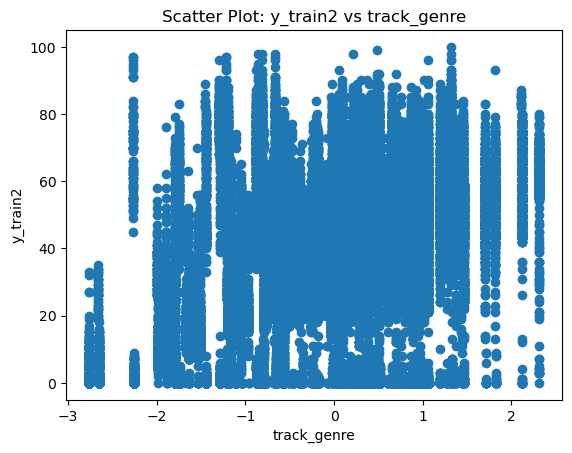

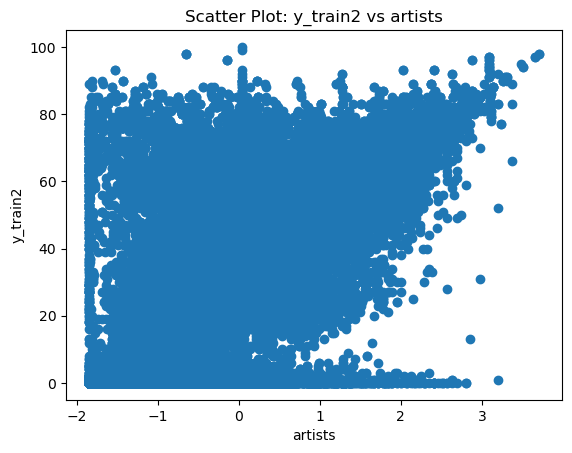

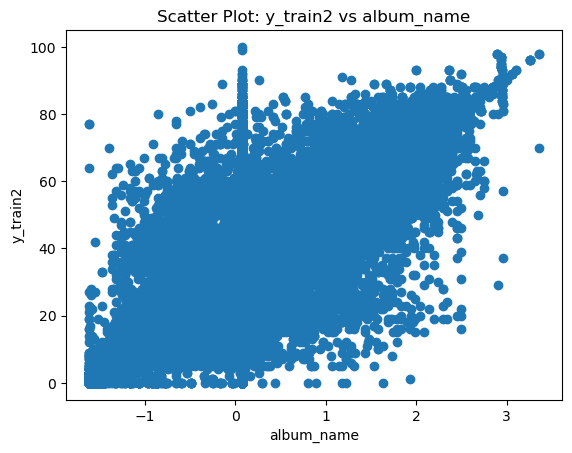

In [80]:
# Convert y_train to a Pandas Series
y_train2 = pd.Series(y_train)

# Create a scatter plot for y_train2 vs track_genre
plt.scatter(X_train_scaled['track_genre'], y_train2)
plt.xlabel('track_genre')
plt.ylabel('y_train2')
plt.title('Scatter Plot: y_train2 vs track_genre')
plt.show()

# Create a scatter plot for y_train2 vs artists
plt.scatter(X_train_scaled['artists'], y_train2)
plt.xlabel('artists')
plt.ylabel('y_train2')
plt.title('Scatter Plot: y_train2 vs artists')
plt.show()

# Create a scatter plot for y_train2 vs album_name
plt.scatter(X_train_scaled['album_name'], y_train2)
plt.xlabel('album_name')
plt.ylabel('y_train2')
plt.title('Scatter Plot: y_train2 vs album_name')
plt.show()

we can see that the relationship between album_name and popularity, and between artists and popularity is a little bit more linear

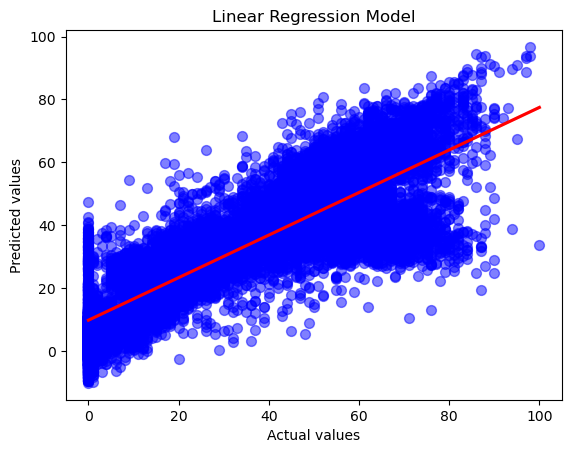

In [81]:
# graph regression line
sns.regplot(x=y_test.ravel(), y=y_pred_test_linear.ravel(), line_kws={'color': 'red'}, scatter_kws={'color': 'blue', 'alpha': 0.5, 's': 50})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Model')
plt.show()

Taking into consideration the fact that our independent variables, with the exception of track_genre, album_name and artists, are all very poorly correlated with the dependent variable, and therefore not all the features may contribute significantly to the prediction, we perform both a Lasso regression to introduce some regularization terms.

### Lasso Regression

is a type of linear regression model that incorporates regularization. It is particularly useful for feature selection and dealing with high-dimensional datasets. In traditional linear regression, the goal is to fit a linear equation to the data by minimizing the sum of squared differences between the predicted values and the actual values. However, in some cases, this can lead to overfitting, where the model becomes too complex and captures noise in the data.

Lasso regression addresses this issue by adding a penalty term to the ordinary least squares objective function. 
The main idea behind lasso regression is that it encourages the coefficients of less important features to be reduced to zero, effectively performing feature selection.

we perform also a GridSearchCV try to controls the amount of regularization applied to the model by changing the value of alpha hyperparameter that determines the balance between fitting the training data and reducing the complexity of the model by shrinking the coefficients of the features (alpha = 0 no regularization)

In [85]:
# import the libraries
from sklearn.linear_model import Lasso

# set up the model
lasso_reg = Lasso(random_state=42)

# defyine the parameters for GridSearchCV
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}

# Create GridSearchCV object
grid_search_lasso = GridSearchCV(lasso_reg, param_grid_lasso, cv=3, n_jobs= -1)

# Perform grid search
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the results
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

# best_params_lasso = {'alpha': 0.1}

# Create the model with the best parameters found
best_lasso_reg = Lasso(**best_params_lasso)

# Train the model with the training data
best_lasso_reg.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train_lasso = best_lasso_reg.predict(X_train_scaled)

# Calculate performance metrics for training
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
rmse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso, squared=False)

# Make predictions on the test data
y_pred_test_lasso = best_lasso_reg.predict(X_test_scaled)

# Calculate performance metrics for testing
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
rmse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso, squared=False)

# Print the performance metrics
print("Training Set:")
print("R^2:", r2_train_lasso)
print("RMSE:", rmse_train_lasso)
print("\nTest Set:")
print("R^2:", r2_test_lasso)
print("RMSE:", rmse_test_lasso)


Training Set:
R^2: 0.7857066518352833
RMSE: 10.316372086265556

Test Set:
R^2: 0.7130793465821357
RMSE: 11.93252221338589


In [44]:
best_params_lasso

{'alpha': 0.1}

as we can see these results are the same as linear regression, and if Lasso regression does not perform better than linear regression, it suggests that the added regularization and feature selection capabilities of lasso regression were not beneficial for the specific dataset and modeling task at hand.

## Ensemble methods

After our first two interpretable model, to improve our results we pass on the ensemble methods

### Gradient Boosting

The Gradient Boosting Regressor is an iterative algorithm that uses a weighted version of the training 
set to train the algorithm at each iteration. At the first iteration, it uses all the original training set, then, at each 
subsequent iteration, it reassigns weights to the misclassified observations. The weights of the models are 
updated by computing the negative gradient of the loss function with respect to the model's prediction, which 
is then used as a target for the next model.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model to optimize
gradient = GradientBoostingRegressor(random_state=42)

# Define the parameters to explore
param_grid_gradient = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the GridSearchCV object
grid_search_gradient = GridSearchCV(gradient, param_grid_gradient, n_jobs=-1, cv=3)

# Perform grid search
grid_search_gradient.fit(X_train_scaled, y_train)

# Get the results
best_params_gradient = grid_search_gradient.best_params_
best_score_gradient = grid_search_gradient.best_score_

# Create the model with the best found parameters
best_model_gradient = GradientBoostingRegressor(**best_params_gradient)

# Train the model with the training data
best_model_gradient.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train_gradient = best_model_gradient.predict(X_train_scaled)

# Calculate performance metrics for the training set
r2_train_gradient = r2_score(y_train, y_pred_train_gradient)
rmse_train_gradient = mean_squared_error(y_train, y_pred_train_gradient, squared=False)

# Make predictions on the test data
y_pred_test_gradient = best_model_gradient.predict(X_test_scaled)

# Calculate performance metrics for the test set
r2_test_gradient = r2_score(y_test, y_pred_test_gradient)
rmse_test_gradient = mean_squared_error(y_test, y_pred_test_gradient, squared=False)

# Print the performance metrics
print("Training Set:")
print("R^2:", r2_train_gradient)
print("RMSE:", rmse_train_gradient)
print("\nTest Set:")
print("R^2:", r2_test_gradient)
print("RMSE:", rmse_test_gradient)


Training Set:
R^2: 0.9695583759259719
RMSE: 3.8877262943718374

Test Set:
R^2: 0.8143137970272326
RMSE: 9.604719179276078


In [47]:
best_params_gradient

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

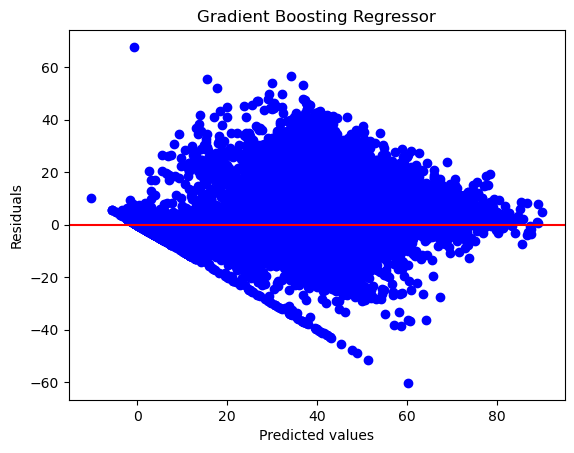

In [46]:
# grafico overfitting
residuals = y_test.ravel() - y_pred_test_gradient.ravel()

# Plot the residuals against the predicted values
plt.scatter(y_pred_test_gradient, residuals, color = "blue")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title('Gradient Boosting Regressor')
plt.show()

we did this graph that plots residuals and predicted values. If we found patterns on this image it would've meant that overfitting was occurring. 
In fact as we can see there is some kind of pattern here, and in fact our model is overfitting.

In the graph, the axes represent the predicted values and the residuals, respectively. The points on the graph represent the discrepancies between the predicted values and the actual values. The x-axis shows the predicted values, while the y-axis represents the residuals.

If the regression model fits the data and does not suffer from overfitting, the points on the graph are expected to be randomly distributed around the horizontal line (the y-axis=0). This means that the residuals have a random distribution and do not show any specific pattern or trend. This indicates that the model has adequately captured the relationships between the variables and can generalise well to new data.

On the other hand, if the model suffers from overfitting, the points on the graph might show a pattern or trend. For example, there could be a linear pattern developing from the points, indicating a constant discrepancy between predicted and actual values. In addition, the residuals might show a non-random scatter around the reference line y=0.

as we can see from the large difference between the performance on the training and on the test and from the graph, our model is doing overfitting, therefore we have to simplify the model.

By considering that the best parameters of the GridSearchCV are {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300} in order to reduce the complexity we tried to reduce the max_depth and n_estimators by hand tring to reach a less overfitted model.

In [48]:
# Define the model with the specified parameters
best_model_gradient = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)

# Train the model with the training data
best_model_gradient.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train_gradient = best_model_gradient.predict(X_train_scaled)

# Calculate performance metrics for the training set
r2_train_gradient = r2_score(y_train, y_pred_train_gradient)
rmse_train_gradient = mean_squared_error(y_train, y_pred_train_gradient, squared=False)

# Make predictions on the test data
y_pred_test_gradient = best_model_gradient.predict(X_test_scaled)

# Calculate performance metrics for the test set
r2_test_gradient = r2_score(y_test, y_pred_test_gradient)
rmse_test_gradient = mean_squared_error(y_test, y_pred_test_gradient, squared=False)

# Print the performance metrics
print("Training Set:")
print("R^2:", r2_train_gradient)
print("RMSE:", rmse_train_gradient)
print("\nTest Set:")
print("R^2:", r2_test_gradient)
print("RMSE:", rmse_test_gradient)


Training Set:
R^2: 0.8508809059734708
RMSE: 8.60455472184738

Test Set:
R^2: 0.7996773341190241
RMSE: 9.976079452698436


As we can see we have reduced a lot the difference between training and test performance. let's try no other model to see if we can improve the performance on the test set.

### XGBoost

The XGBoost Regressor is an advanced version of the Gradient Boosting Regressor that incorporates 
regularization techniques, such as limiting the depth of the decision trees and introducing penalties for large 
weights in the model. Additionally, it uses a more recent algorithm to optimize the data splitting at each node 
of the decision tree, making it faster and more accurate than traditional gradient boosting algorithms.

**DMatrices**

DMatrix is a specific data format provided by the XGBoost library, which offers an optimized implementation for training boosting tree models.
DMatrix is used to encapsulate the training and test data in a format compatible with XGBoost. the main advantage that DMatrix bring to us is that this structure allow storing data in a highly efficient format optimized for XGBoost's training and prediction operations. This results in faster training times and efficient memory usage.



In [91]:
# import the libraries
import xgboost as xgb

# creation of D-matrices
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the model
boost = xgb.XGBRegressor()

# Define parameters for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0],
}

#best_params_xgb = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


# Create GridSearchCV object
grid_search_xgb = GridSearchCV(boost, param_grid_xgb, n_jobs=-1, cv=3)

# perform gridsearch
grid_search_xgb.fit(X_train_scaled, y_train)

# get the results
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Create the model with the best parameters found
best_model_xgb = xgb.XGBRegressor(**best_params_xgb)

# train the model with training data
best_model_xgb.fit(X_train_scaled, y_train)

# make predictions on the training data
y_pred_train_xgb = best_model_xgb.predict(X_train_scaled)

# Calculate the performance metrics for the training set
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
rmse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)

# make predictions on the test data
y_pred_test_xgb = best_model_xgb.predict(X_test_scaled)

# Calculate the performance metrics for the test set
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
rmse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)

# print performance metrics
print("Training Set:")
print("R^2:", r2_train_xgb)
print("RMSE:", rmse_train_xgb)
print("\nTest Set:")
print("R^2:", r2_test_xgb)
print("RMSE:", rmse_test_xgb)


Training Set:
R^2: 0.967756117709457
RMSE: 4.0017164819033795

Test Set:
R^2: 0.8096215795479538
RMSE: 9.719864384521323


In [66]:
best_params_xgb

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

as we can see from the results, also this model is overfitting, therefore we have to reduce the complexity of the model.

As before we have changed the hyperparameters manually (without doing a GridSearchCV) and more specificly we have tried these combination of hyperparameters:
- learning_rate=0.1, max_depth=7, n_estimators=300
- learning_rate=0.1, max_depth=7, n_estimators=200
- learning_rate=0.1, max_depth=7, n_estimators=100
- learning_rate=0.1, max_depth=5, n_estimators=100
- learning_rate=0.1, max_depth=3, n_estimators=100

in the next chunck you can see the one that performs best and at the same time reduce the overfitting

In [89]:
import xgboost as xgb

# Creation of D-matrices
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the model 
boost = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state= 42)

# train the model with training data
boost.fit(X_train_scaled, y_train)

# make predictions on training data
y_pred_train_xgb = boost.predict(X_train_scaled)

# calculate performance metrics for the training set
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
rmse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)

# make predictions on test data
y_pred_test_xgb = boost.predict(X_test_scaled)

# calculate performance metrics for the test set
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
rmse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)

# print the results
print("Training Set:")
print("R^2:", r2_train_xgb)
print("RMSE:", rmse_train_xgb)
print("\nTest Set:")
print("R^2:", r2_test_xgb)
print("RMSE:", rmse_test_xgb)


Training Set:
R^2: 0.8511673553661678
RMSE: 8.59749143663108

Test Set:
R^2: 0.795757645733255
RMSE: 10.067560539585337


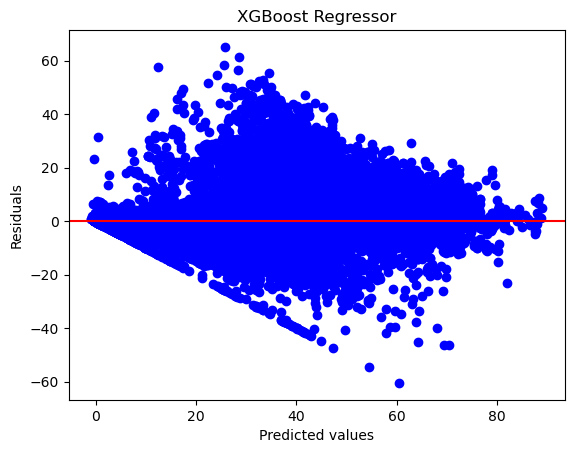

In [50]:
# grafico overfitting
residuals = y_test.ravel() - y_pred_test_xgb.ravel()

# Plot the residuals against the predicted values
plt.scatter(y_pred_test_xgb, residuals, color = "blue")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title('XGBoost Regressor')
plt.show()

however as we can see this graph has remains almost the same.

*There will be a further explanation on that*

### Random Forest

The Random Forest model consists of multiple trees whose training set is evaluated through the 
Bagging technique. The Bagging algorithm iteratively evaluates a different sample with replacement of the 
same original training set for each tree.


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the model
random_forest = RandomForestRegressor()

# Define the parameter grid
param_grid_random = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search_random = GridSearchCV(random_forest, param_grid_random, n_jobs=-1, cv=3)

# perform the grid search
grid_search_random.fit(X_train_scaled, y_train)

# get the result
best_params_random = grid_search_random.best_params_
best_score_random = grid_search_random.best_score_

# Create the model with the best parameters found
best_model_random = RandomForestRegressor(**best_params_random)

# train the model with the training data
best_model_random.fit(X_train_scaled, y_train)

# make predictions on the training data
y_pred_train_random = best_model_random.predict(X_train_scaled)

# Calculate perfomance metrics for the training set
r2_train_random = r2_score(y_train, y_pred_train_random)
rmse_train_random = mean_squared_error(y_train, y_pred_train_random, squared=False)

#make predictions on the test data
y_pred_test_random = best_model_random.predict(X_test_scaled)

# calculate performance metrics for the test set
r2_test_random = r2_score(y_test, y_pred_test_random)
rmse_test_random = mean_squared_error(y_test, y_pred_test_random, squared=False)

# print the result
print("Training Set:")
print("R^2:", r2_train_random)
print("RMSE:", rmse_train_random)
print("\nTest Set:")
print("R^2:", r2_test_random)
print("RMSE:", rmse_test_random)


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


Training Set:
R^2: 0.9856013458004114
RMSE: 2.6741366940457936

Test Set:
R^2: 0.8241828326387816
RMSE: 9.340755090852461


In [60]:
best_params_random

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

as we can see from the results, also this model is overfitting, therefore we have to reduce the complexity of the model.

As before we have changed the hyperparameters manually (without doing a GridSearchCV).

in the next chunck you can see the one that performs best and at the same time reduce the overfitting.

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the model
random_forest = RandomForestRegressor(n_estimators=100,
                                      max_depth=10,
                                      min_samples_split=10,
                                      min_samples_leaf=1,
                                      max_features='sqrt',
                                      n_jobs=-1,
                                      random_state=42)

# train the model with training data
random_forest.fit(X_train_scaled, y_train)

# make predictions on the training data
y_pred_train_random = random_forest.predict(X_train_scaled)

# Calculate performance metrics for the training set
r2_train_random = r2_score(y_train, y_pred_train_random)
rmse_train_random = mean_squared_error(y_train, y_pred_train_random, squared=False)

# make predictions on the test data
y_pred_test_random = random_forest.predict(X_test_scaled)

# Calculate performance metrics for the test set
r2_test_random = r2_score(y_test, y_pred_test_random)
rmse_test_random = mean_squared_error(y_test, y_pred_test_random, squared=False)

# print the results
print("Training Set:")
print("R^2:", r2_train_random)
print("RMSE:", rmse_train_random)
print("\nTest Set:")
print("R^2:", r2_test_random)
print("RMSE:", rmse_test_random)


Training Set:
R^2: 0.8318283432158494
RMSE: 9.139007923594933

Test Set:
R^2: 0.7725561055516224
RMSE: 10.624010406514849


So at this point we can say that between all the models that we have consider, the XGBoost with this combination of hyperparameters learning_rate=0.1, max_depth=3, n_estimators=100, is the one that performs the best reaching an R2 of 0.8069703826615415.

However as we saw from the plot for the overfitting it seems that the overall situation has not changed that much. Therefore in order to give more robustness to the predictions we have performed a Voting Regressor.

### Voting Regressor

Voting Regressor is an ensemble machine learning algorithm that combines multiple regression models to make predictions. It aggregates the predictions from individual regressor models and outputs the average or weighted average prediction.

we use these models for the VotingRegressor:
- XGBoost (the one who overfit the least)
- RandomForest (the one with the highest performance)
- LinearRegressor 

we decide to use linear regressor rather than gradient boosting, even if the perfomance was worst, because we were motivated by the desire to capture different aspects and patterns in the data, and gradient boosting has a very similar process to XGBoost.

In [73]:
# import the libraries
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# build the models
linear_reg = LinearRegression()
xgb_reg = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state= 42, n_jobs=-1)
rf_reg = RandomForestRegressor(n_estimators=100,
                                      max_depth=10,
                                      min_samples_split=10,
                                      min_samples_leaf=1,
                                      max_features='sqrt',
                                      n_jobs=-1,
                                      random_state=42)

# build VotingRegressor 
voting_reg = VotingRegressor([
    ('linear', linear_reg),
    ('xgb', xgb_reg),
    ('rf', rf_reg)
])

# train VotingRegressor
voting_reg.fit(X_train_scaled, y_train)

# make predictions on training data
y_pred_train_voting = voting_reg.predict(X_train_scaled)

# make predictions on test data
y_pred_test_voting = voting_reg.predict(X_test_scaled)

# Calculate performance mestrics
rmse_train_voting = mean_squared_error(y_train, y_pred_train_voting, squared=False)
r2_train_voting = r2_score(y_train, y_pred_train_voting)

rmse_test_voting = mean_squared_error(y_test, y_pred_test_voting, squared=False)
r2_test_voting = r2_score(y_test, y_pred_test_voting)

# print the results
print("Training Set:")
print("RMSE:", rmse_train_voting)
print("R^2:", r2_train_voting)
print("\nTest Set:")
print("RMSE:", rmse_test_voting)
print("R^2:", r2_test_voting)


Training Set:
RMSE: 8.995879017573996
R^2: 0.8370546740686416

Test Set:
RMSE: 10.563936658020987
R^2: 0.7751210083973059


as we can see the performance of the voting regressor is lower than our best model alone, therefore the best model in predicting the popularity score is **XGBoost**

# Feature importance with SHAP

SHAP is a powerful library that makes use of a mathematical method to explain the predictions of machine learning models. 
It is based on the concepts of game theory and can be used to explain the predictions of any machine learning model 
by calculating the contribution of each feature to the prediction.
Here we used shap on our best model to let it be more interpretable and to understand better how this model makes its predicitons.
We want to use this library to get the insights on how our best model (gradient boosting) works.
First of all we must create an explainer putting as variables the model and the dataset which will be used to do the predictions.

In [90]:
import shap

# Inizialization shap explainer object
explainer = shap.Explainer(boost.predict, X_test_scaled)

# Explain the individual predictions
shap_values = explainer(X_test_scaled)

Permutation explainer: 22711it [10:40, 35.00it/s]                                                                      


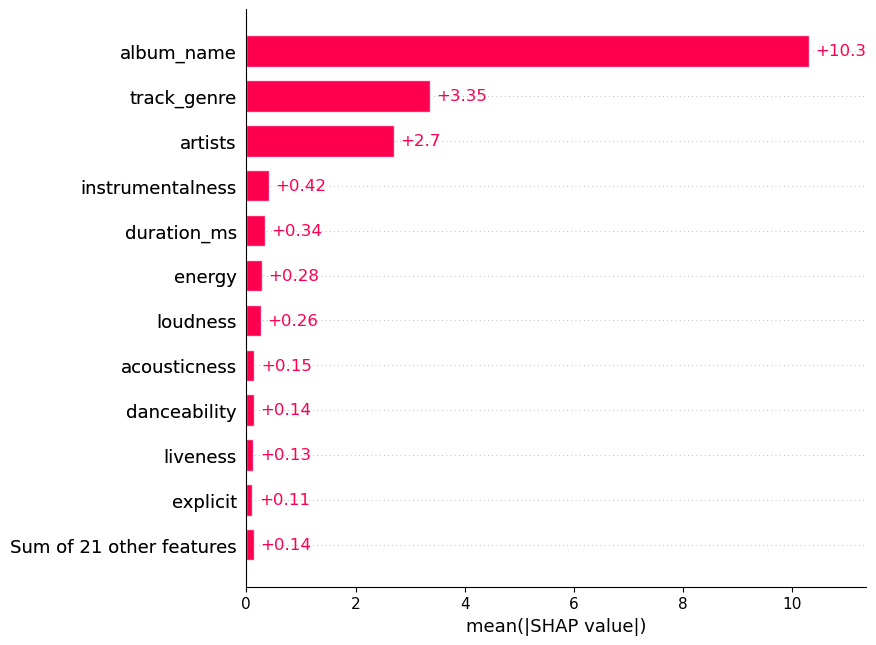

In [93]:
# graph of total contribution of variables
fig = shap.plots.bar(shap_values, max_display=12, show = False)
plt.show()

In this graph we can see the contribution of each variable to the predictions. Higher is the shap value, higher is the importance of that predictor. Here we have only the total importance without saying if it directly or inversely correlated with the response variable.

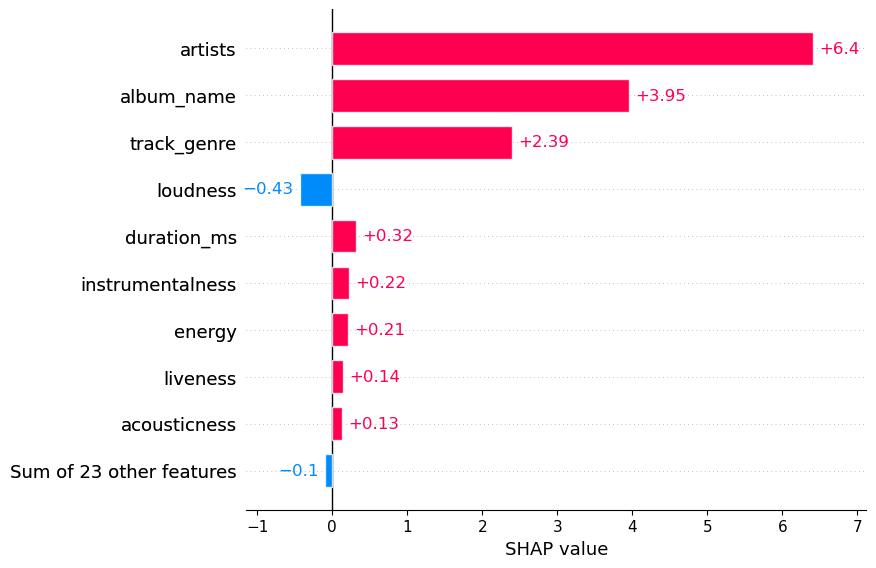

In [94]:
# graph for positive and negative contribution
fig = shap.plots.bar(shap_values[0], show = False)
plt.show()

If we use the same function but on a single observation, things become more interesting because we can see the direct or indirect relationship for each predictor with the value predicted. For example here we notice that for this single prediction the album_name was the most important predictor ind it is directly related to the popularity score together with artists and track_genre, while energy and speechiness are inversely correlated.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


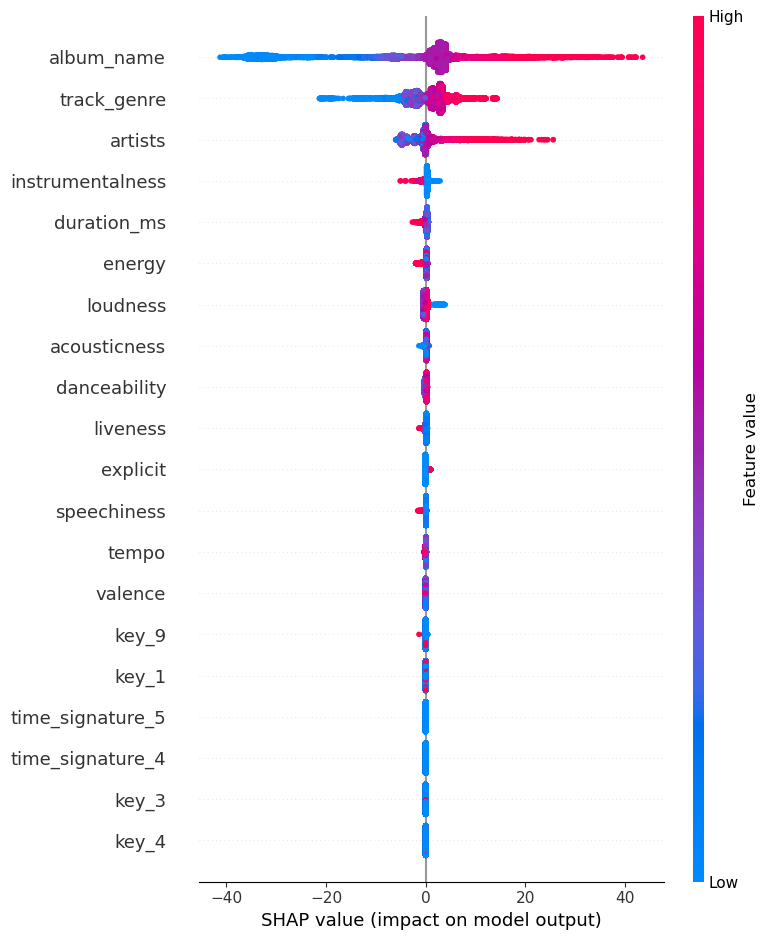

In [95]:
# Calculate feature importances
importance = best_model_xgb.feature_importances_

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, show=False)
plt.show()

This plot helps us a lot to see how the variables contributed, the color is the value of the feature, blue if it is low, red if it is high. The features on the left are oredered by importance and on the bottom there are the shap values. Remember that the shap values works like this: positive and high, influence directly and a lot the prediction, negative and low, influence inversely the prediction a lot.
Now, for every feature:
- album_name: low values of album_name tends to influence inversely the prediction (decrease the popularity score) while high value influence positively the prediction. 
- track_genre: low values of track_genre tends to influence inversely the prediction (decrease the popularity score) while high value influence positively the prediction. it's interesting how the high values influence the prediction in a positive way but not so aggressively while low values have an high weight reaching shap values of around -30
- artists: low values of artists tends to influence inversely the prediction (decrease the popularity score) while high value influence positively the prediction. in this case the low values influence the prediction in a negative way but not so aggressively while high values have an high weight reaching shap values of around 30.
- instrumentalness: High values of instrumentalness decreases the popularity score prediction and low score increases it. The shap values are already decreasing since we are reaching less important variables.

In fact we can see that for what concern the other features, the contribution is almost close to zero. This can inform us that the most important features to predict popularity are album_name, track_genre, artists, therefore the recommendations should be more focus on that rather than audio_features.


 

# Final Insights

considering that our model gave the most importance only to 3 variables, here we will provide 2 tables to easily see which are the average or median values of the audio features of the most popular songs (we considered only the songs with a popularity score higher than the average)

In [96]:
# calculate the average popularity and create a filter based on that condition to create a new dataset
average_popularity = df['popularity'].mean()
filter_condition = df['popularity'] > average_popularity
filtered_df = df[filter_condition].copy()

In [97]:
# calculate the mean and standard deviation for each numerical variable, grouped by popularity bins

from IPython.display import display

# Define the popularity bins based on quartiles
popularity_bins = pd.qcut(filtered_df['popularity'], [0, 0.25, 0.5, 0.75, 1.0])

# Select the variables of interest
variables = ['duration_ms', 'danceability', 'energy', 'loudness',
             'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo']

# Calculate the mean and standard deviation for each variable in each popularity bin
summary_table = filtered_df.groupby(popularity_bins)[variables].agg(['mean', 'std'])

# Flatten the column names
summary_table.columns = ['{}_{}'.format(var, stat) for var, stat in summary_table.columns]

# Format the summary table for better display
summary_table = summary_table.round(2)
summary_table.index = summary_table.index.astype(str)
summary_table.index.name = 'Popularity Bins'

# Display the formatted summary table as a dataframe
display(summary_table)

duration_ms_mean  duration_ms_std  danceability_mean  \
Popularity Bins                                                         
(33.999, 42.0]          233001.95        114238.61               0.57   
(42.0, 50.0]            237485.81        100071.39               0.57   
(50.0, 60.0]            221709.77         83120.28               0.57   
(60.0, 100.0]           218799.41         63474.12               0.60   

                 danceability_std  energy_mean  energy_std  loudness_mean  \
Popularity Bins                                                             
(33.999, 42.0]               0.16         0.66        0.23          -8.10   
(42.0, 50.0]                 0.16         0.63        0.23          -8.07   
(50.0, 60.0]                 0.16         0.61        0.26          -8.50   
(60.0, 100.0]                0.16         0.65        0.22          -7.39   

                 loudness_std  speechiness_mean  speechiness_std  \
Popularity Bins                                                    
(33.999, 42.0]           4.44              0.08             0.08   
(42.0, 50.0]             4.42              0.07             0.08   
(50.0, 60.0]             5.52              0.07             0.08   
(60.0, 100.0]            4.58              0.08             0.08   

                 acousticness_mean  acousticness_std  instrumentalness_mean  \
Popularity Bins                                                               
(33.999, 42.0]                0.31              0.31                   0.13   
(42.0, 50.0]                  0.34              0.32                   0.15   
(50.0, 60.0]                  0.32              0.33                   0.15   
(60.0, 100.0]                 0.26              0.29                   0.07   

                 instrumentalness_std  liveness_mean  liveness_std  \
Popularity Bins                                                      
(33.999, 42.0]                   0.29           0.24          0.22   
(42.0, 50.0]                     0.30           0.24          0.23   
(50.0, 60.0]                     0.30           0.19          0.16   
(60.0, 100.0]                    0.20           0.18          0.14   

                 valence_mean  valence_std  tempo_mean  tempo_std  
Popularity Bins                                                    
(33.999, 42.0]           0.50         0.27      123.23      30.67  
(42.0, 50.0]             0.45         0.26      123.71      29.49  
(50.0, 60.0]             0.43         0.24      122.10      29.31  
(60.0, 100.0]            0.49         0.23      120.79      28.86

from this table it is possible to see the mean and the standard deviation of the audio features (numerical variables) separated in bins.

In [98]:
# calculate the median value for each categorical variable, grouped by popularity bins

# Define the popularity bins based on quartiles
popularity_bins = pd.qcut(filtered_df['popularity'], [0, 0.25, 0.5, 0.75, 1.0])

# Select the variables of interest
variables = ['explicit', 'key', 'mode', 'time_signature']

# Calculate the median for each variable in each popularity bin
summary_table_median = filtered_df.groupby(popularity_bins)[variables].median()

# Format the summary table for better display
summary_table_median = summary_table_median.round(2)
summary_table_median.index = summary_table_median.index.astype(str)
summary_table_median.index.name = 'Popularity Bins'

# Display the formatted summary table as a dataframe
display(summary_table_median)

explicit  key  mode  time_signature
Popularity Bins                                     
(33.999, 42.0]        0.0  5.0   1.0             4.0
(42.0, 50.0]          0.0  5.0   1.0             4.0
(50.0, 60.0]          0.0  5.0   1.0             4.0
(60.0, 100.0]         0.0  5.0   1.0             4.0